<div >
<img src = "../banner.jpg" />
</div>

<a target="_blank" href="https://colab.research.google.com/github/ignaciomsarmiento/BDML_202401/blob/main/Modulo05/Modulo05_TreeMethods.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Tree-Based Methods

## Predicting House Prices


$$
Precio=f(structural\,attributes,location,...)
$$



## CARTs

Let's load the packages:

In [ ]:
# install.packages("pacman") #run this line if you use Google Colab

In [1]:
#packages
require("pacman")
p_load("tidyverse","ggplot2")

Loading required package: pacman



There are multiple packages to estimate CARTs, I'm going to use `rpart`

In [2]:
p_load("rpart")

### Toy example

In [3]:
db<-read.csv('https://raw.githubusercontent.com/ignaciomsarmiento/datasets/main/toy_houses.csv')

In [4]:
dim(db)

[1] 1000    3

In [5]:
head(db)

,price,habitaciones,DCBD
,<dbl>,<int>,<dbl>
1,162753.09,3,1.190307
2,73131.30,0,1.910839
3,162757.45,2,1.227716
4,73127.75,1,1.824990
5,73128.71,0,1.915576
6,98715.60,3,1.505208


In [6]:
summary(db)

     price         habitaciones        DCBD      
 Min.   : 73122   Min.   :0.000   Min.   :1.001  
 1st Qu.: 73133   1st Qu.:1.000   1st Qu.:1.257  
 Median :162749   Median :2.000   Median :1.485  
 Mean   :123534   Mean   :1.993   Mean   :1.498  
 3rd Qu.:162755   3rd Qu.:3.000   3rd Qu.:1.749  
 Max.   :162764   Max.   :8.000   Max.   :2.000  

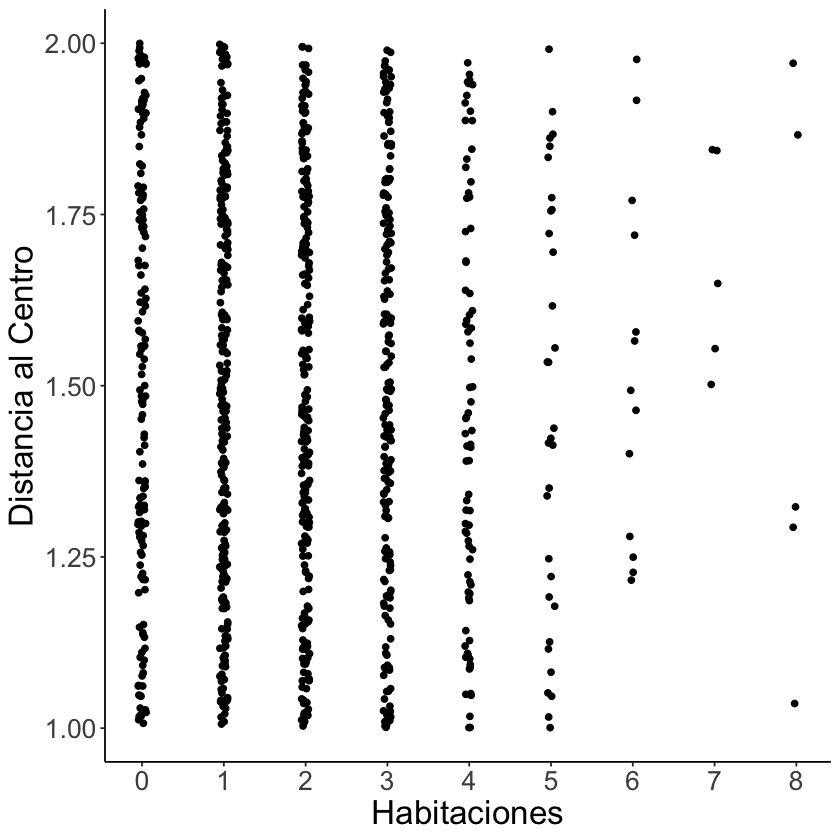

In [7]:
ggplot(db) +
  geom_point(aes(x=habitaciones,y=DCBD),position=position_jitter(width = .05)) +
  scale_x_continuous(breaks=seq(0,8,1)) +
  theme_classic() +
  xlab("Habitaciones") +
  ylab("Distancia al Centro") +
  theme(legend.position =  "none",
      text=element_text(size=20))

### Algorithm


-  Datos: $y_{n\times 1}$  y $X_{n\times k}$ 

-  Definiciones

      -  *j* es la variable que parte el espacio 
      - *s* es el punto de partición


-  Definimos los siguientes semiplanos

\begin{align}
R_1(j,s)=\{X|X_j\leq s\} \,\,\, \& \,\,\, R_2(j,s)=\{X|X_j > s\}
\end{align}

-  *El problema*: buscar la variable de partición $X_j$ y el punto $s$ de forma tal que 


\begin{align}
\underset{j,s}{min} \left[ \underset{y_{R_1}}{min}\sum_{x_i\in R_1(j,s)}(y-y_{R_1})^2+ \underset{y_{R_2}}{min}\sum_{x_i\in R_2(j,s)}(y-y_{R_2})^2\right]
\end{align}



#### Algorithm by hand ("artesanal")

1. Iniciemos por DBCD

In [8]:
MSE_dbcd<-NA

j<-1
for(i in seq(1.25,1.75,0.25)){
    #Region 1
  R1<- db %>% filter(DCBD<=i)
  R1<- R1 %>% mutate(yR1=mean(price))
  MSEr1<- sum((R1$price-R1$yR1)^2)
 #Region 2
  R2<- db %>% filter(DCBD>i)
  R2<- R2 %>% mutate(yR2=mean(price))
  MSEr2<- sum((R2$price-R2$yR2)^2)
  
  MSE_dbcd[j]<-MSEr1+MSEr2
  j<-j+1
}

MSE_dbcd

[1] 1.230580e+12 6.982084e+10 1.138994e+12

2. Luego por Habitaciones

In [9]:
MSE_hab<-NA

for(i in 0:7){
  R1<- db %>% filter(habitaciones<=i)
  R1<- R1 %>% mutate(yR1=mean(price))
  MSEr1<- sum((R1$price-R1$yR1)^2)
  R2<- db %>% filter(habitaciones>i)
  R2<- R2 %>% mutate(yR2=mean(price))
  MSEr2<- sum((R2$price-R2$yR2)^2)
  
  MSE_hab[i+1]<-MSEr1+MSEr2
  
}
MSE_hab

[1] 1.705787e+12 1.693290e+12 1.679039e+12 1.698272e+12 1.713787e+12
[6] 1.716122e+12 1.716019e+12 1.715407e+12

**Mínimo?**

In [10]:
MSE<-c(MSE_dbcd,MSE_hab)
MSE[which.min(MSE)]
MSE

[1] 69820839179

[1] 1.230580e+12 6.982084e+10 1.138994e+12 1.705787e+12 1.693290e+12
 [6] 1.679039e+12 1.698272e+12 1.713787e+12 1.716122e+12 1.716019e+12
[11] 1.715407e+12

#### Algorithm with `rpart`

In [13]:
mytree<-rpart(price~DCBD+habitaciones,data=db)

In [14]:
mytree

n= 1000 

node), split, n, deviance, yval
      * denotes terminal node

1) root 1000 1.716337e+12 123534.30  
  2) DCBD>=1.499274 483 6.982083e+10  81553.15  
    4) habitaciones< 2.5 324 3.060291e+03  73130.58 *
    5) habitaciones>=2.5 159 1.696944e+03  98716.14 *
  3) DCBD< 1.499274 517 4.730729e+03 162754.70 *

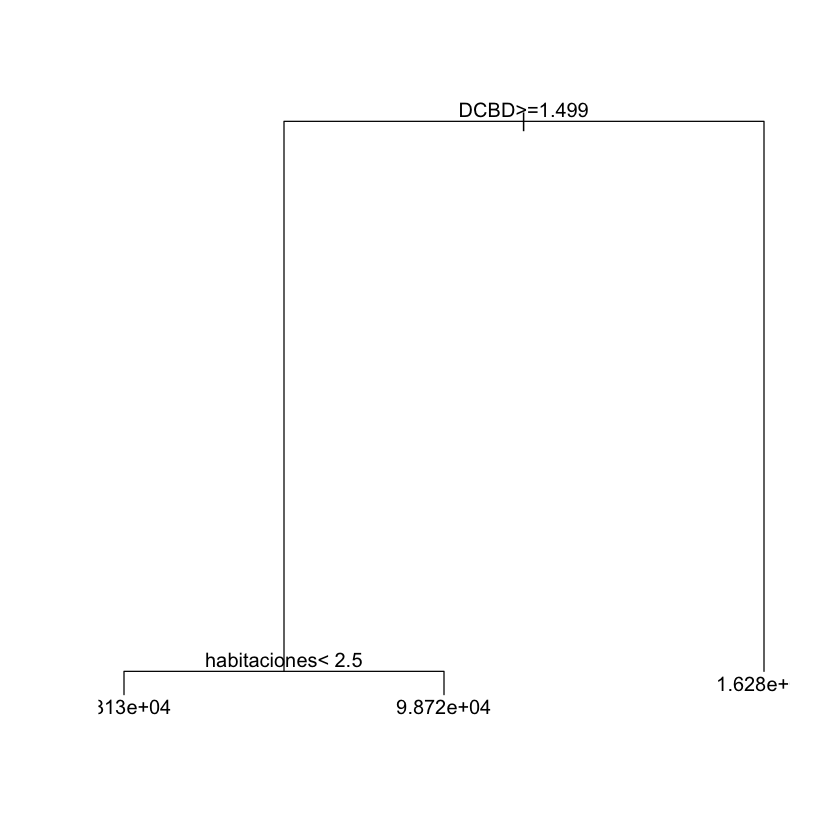

In [15]:
plot(mytree)
text(mytree)

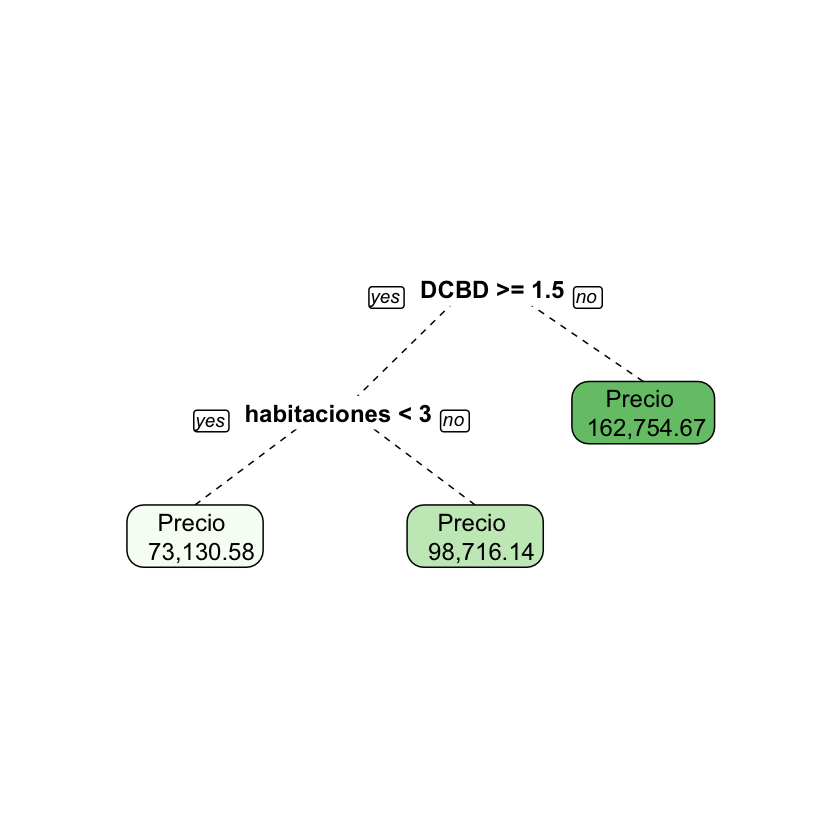

In [16]:
p_load("rpart.plot")

prp(mytree, under = TRUE, branch.lty = 2, yesno = 2, faclen = 0, varlen=15,tweak=1.2,clip.facs= TRUE,box.palette = "Greens",compress=TRUE,ycompress = TRUE,node.fun=function(x, labs, digits, varlen) paste("Precio \n", format(round(mytree$frame$yval, 2), nsmall=0, big.mark=",")))

El árbol es 

\begin{align}
\hat{y} = 162754.67 I(DCBD<1.5) + 98716.14 I(DCBD>=1.5 \& habitaciones>=3) + 73130.58 I(DCBD>=1.5 \& habitaciones<3) 
\end{align}

### Ames Data Set

The data set contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010.

In [17]:
p_load("modeldata")

data("ames", package = "modeldata")

In [18]:
dim(ames)

[1] 2930   74

In [19]:
head(ames)

MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,⋯,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
<fct>,<fct>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<int>,<dbl>,<dbl>
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,⋯,No_Fence,None,0,5,2010,WD,Normal,215000,-93.61975,42.05403
One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,⋯,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.61976,42.05301
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,⋯,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.61939,42.05266
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,⋯,No_Fence,None,0,4,2010,WD,Normal,244000,-93.61732,42.05125
Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,⋯,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.63893,42.06090
Two_Story_1946_and_Newer,Residential_Low_Density,78,9978,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,⋯,No_Fence,None,0,6,2010,WD,Normal,195500,-93.63893,42.06078


The description of the variables can be viewed here: https://jse.amstat.org/v19n3/decock/DataDocumentation.txt

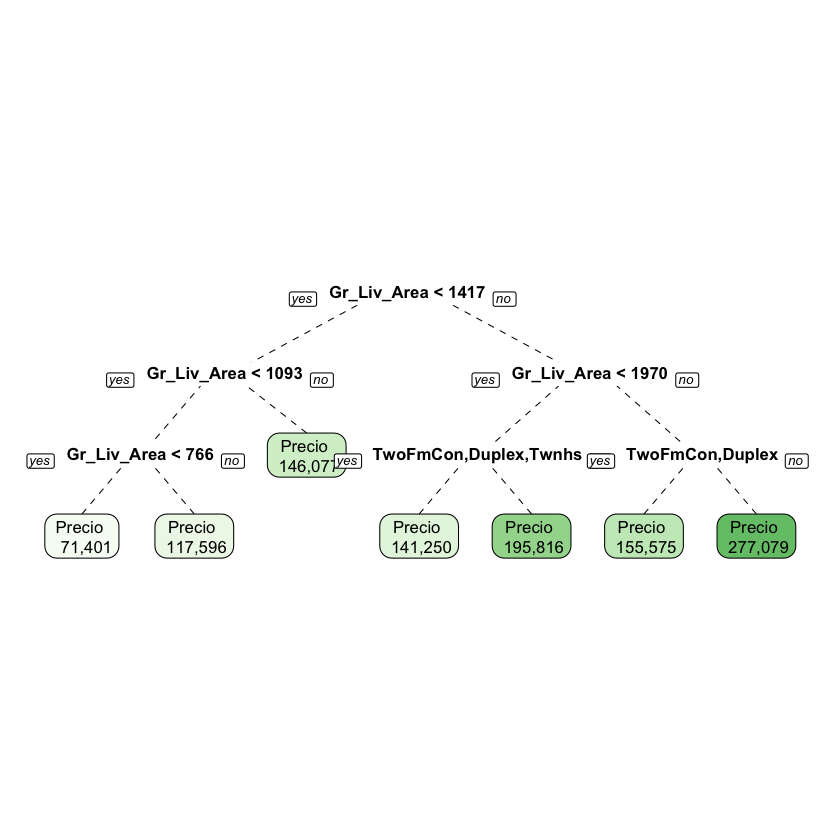

In [20]:
amestree<-rpart(log(Sale_Price) ~  Gr_Liv_Area  + Bldg_Type + Fence + Lot_Area,data=ames, control = list(maxdepth = 3))

p_load("rpart.plot")
prp(amestree, under = TRUE, branch.lty = 2, yesno = 2, faclen = 0, varlen=15,tweak=1.2,clip.facs= TRUE,box.palette = "Greens",compress=FALSE,ycompress = FALSE,node.fun=function(x, labs, digits, varlen) paste("Precio \n", format(round(exp(amestree$frame$yval), 0), nsmall=0, big.mark=",")))

### Sobreajuste

<div >
<img src = "figures/tree_uba.png" width="300"/>
</div>


- Fijar la profundidad del árbol. (implementado en Caret `method=rpart2`)

- Fijar la mínima cantidad de datos que están contenidos dentro de cada hoja. 

- Cost complexity pruning (implementado en Caret con `method=rpart`)

`tidymodels` implementa todos

##### Implementación con Caret

In [21]:
p_load("caret")

In [22]:
fitControl<-trainControl(method ="cv",
                         number=5)

#####  `method=rpart2`  allows to tune Max Tree Depth

In [25]:
set.seed(123)
tree_rpart2 <- train(
    log(Sale_Price) ~ Gr_Liv_Area  + Bldg_Type + Fence + Lot_Area,
    data=ames,
    method = "rpart2",
    trControl = fitControl,
    tuneGrid = expand.grid(maxdepth = seq(1,8,1))
)

In [26]:
tree_rpart2

CART 

2930 samples
   4 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 2344, 2345, 2344, 2343, 2344 
Resampling results across tuning parameters:

  maxdepth  RMSE       Rsquared   MAE      
  1         0.3307490  0.3412068  0.2506236
  2         0.3129377  0.4108913  0.2357003
  3         0.3012935  0.4554833  0.2280263
  4         0.2969431  0.4715011  0.2243649
  5         0.2940238  0.4816534  0.2225891
  6         0.2893923  0.4977432  0.2187853
  7         0.2848199  0.5137234  0.2150838
  8         0.2836619  0.5176284  0.2141427

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was maxdepth = 8.

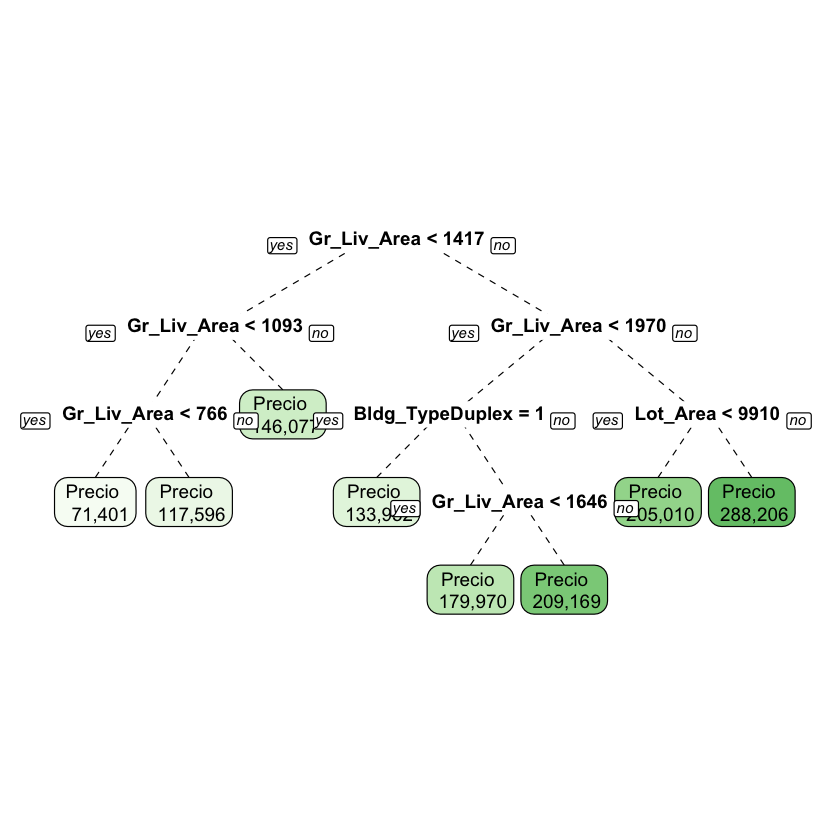

In [27]:
prp(tree_rpart2$finalModel, under = TRUE, branch.lty = 2, yesno = 2, faclen = 0, varlen=15,tweak=1.2,clip.facs= TRUE,box.palette = "Greens",compress=FALSE,ycompress = FALSE,node.fun=function(x, labs, digits, varlen) paste("Precio \n", format(round(exp(tree_rpart2$finalModel$frame$yval), 0), nsmall=0, big.mark=",")))

#### Cost complexity Prunning


Cost complexity del árbol  $T$ con $[T]$ nodos terminales del árbol 
\begin{align}
  C_{\alpha}(T)= \sum_{m=1}^{[T]}  \sum_{x_i\in R_m} (y_i-\hat{y}_m)^2 + \alpha [T]
\end{align}


Objetivo: para un dado $\alpha$, encontrar el pruning óptimo que minimice  $C_{\alpha}(T)$

Se logra eliminando sucesivamente las ramas que producen un aumento mínimo en $\sum_{x_i\in R_m} (y_i-\hat{y}_m)^2 $


##### Algoritmo completo

  - Hacemos crecer el árbol

  - Para un dado $\alpha$, aplicamos  *cost complexity pruning* 
    
  - Utilizamos K-fold cross-validation para elegir $\alpha$. 

  
Tenemos entonces una secuencia de subarboles para distintos valores de $\alpha$ 

Elegimos el $\alpha$ y el subárbol que tienen el menor error de predicción.

#####  `method=rpart`  only allows to tune Complexity Parameter

- Can change the length


In [28]:
set.seed(123)
tree_lenght <- train(
    log(Sale_Price) ~ Gr_Liv_Area  + Bldg_Type + Fence + Lot_Area,
    data=ames,
    method = "rpart",
    trControl = fitControl,
    tuneLength=20
)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


In [29]:
tree_lenght

CART 

2930 samples
   4 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 2344, 2345, 2344, 2343, 2344 
Resampling results across tuning parameters:

  cp           RMSE       Rsquared   MAE      
  0.002663317  0.2638306  0.5833696  0.1951839
  0.002928339  0.2639011  0.5830236  0.1952403
  0.003041636  0.2649449  0.5798166  0.1959880
  0.003465082  0.2659967  0.5766074  0.1974884
  0.003602553  0.2663203  0.5754987  0.1979051
  0.004342771  0.2706438  0.5615014  0.2015746
  0.004494195  0.2710421  0.5602756  0.2019178
  0.005388410  0.2760364  0.5438482  0.2065736
  0.005580504  0.2760364  0.5438482  0.2065736
  0.006812401  0.2788874  0.5339517  0.2098885
  0.008018890  0.2806451  0.5278070  0.2114909
  0.009010266  0.2832222  0.5189590  0.2138051
  0.009277384  0.2832222  0.5189590  0.2138051
  0.012132238  0.2874601  0.5046112  0.2169528
  0.014271840  0.2903955  0.4943203  0.2198354
  0.018477494  0.2970067  0.4712615  0.2249536
  0.0258

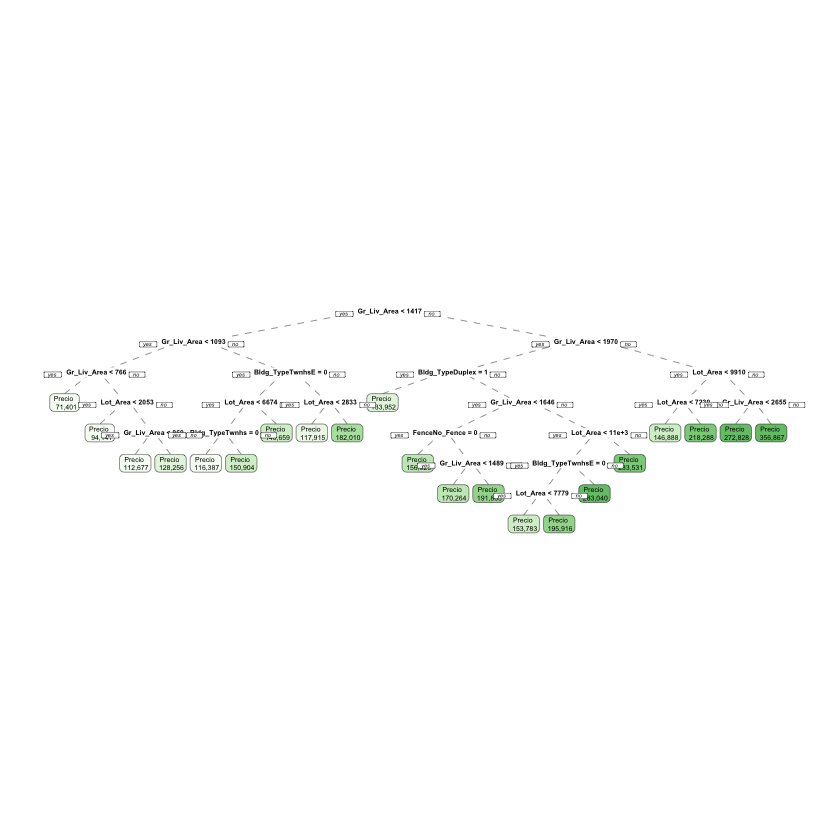

In [30]:
prp(tree_lenght$finalModel, under = TRUE, branch.lty = 2, yesno = 2, faclen = 0, varlen=15,tweak=1.2,clip.facs= TRUE,box.palette = "Greens",compress=FALSE,ycompress = FALSE,node.fun=function(x, labs, digits, varlen) paste("Precio \n", format(round(exp(tree_lenght$finalModel$frame$yval), 0), nsmall=0, big.mark=",")))

- Or the grid

In [31]:
set.seed(123)
tree_grid <- train(
    log(Sale_Price) ~ Gr_Liv_Area  + Bldg_Type + Fence + Lot_Area,
    data=ames,
    method = "rpart",
    trControl = fitControl,
    tuneGrid = expand.grid(cp = seq(0.001707763, 0.001707765, length.out = 100))
)


In [32]:
tree_grid

CART 

2930 samples
   4 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 2344, 2345, 2344, 2343, 2344 
Resampling results across tuning parameters:

  cp           RMSE       Rsquared   MAE      
  0.001707763  0.2604854  0.5943749  0.1916694
  0.001707763  0.2604854  0.5943749  0.1916694
  0.001707763  0.2604854  0.5943749  0.1916694
  0.001707763  0.2604854  0.5943749  0.1916694
  0.001707763  0.2604854  0.5943749  0.1916694
  0.001707763  0.2604854  0.5943749  0.1916694
  0.001707763  0.2604854  0.5943749  0.1916694
  0.001707763  0.2604854  0.5943749  0.1916694
  0.001707763  0.2604854  0.5943749  0.1916694
  0.001707763  0.2604854  0.5943749  0.1916694
  0.001707763  0.2604854  0.5943749  0.1916694
  0.001707763  0.2604854  0.5943749  0.1916694
  0.001707763  0.2604854  0.5943749  0.1916694
  0.001707763  0.2604854  0.5943749  0.1916694
  0.001707763  0.2604854  0.5943749  0.1916694
  0.001707763  0.2604854  0.5943749  0.1916694
  0.0017

More details here: https://topepo.github.io/caret/train-models-by-tag.html#tree-based-model

### Comentarios sobre Árboles


#### Pros: 
  
    - Los árboles son muy fáciles de explicar a las personas (probablemente incluso más fáciles que la regresión lineal)

    - Los árboles se pueden trazar gráficamente y son fácilmente interpretados incluso por no expertos. Variables más importantes en la parte superior



#### Cons:
    
    - Si la estructura es lineal, CART no funciona bien
    
<div >
<img src = "figures/tree_vs_reg.png" />
</div>


    - Los árboles no son muy robustos 
    

## Random Forests

We are going to use `ranger: A Fast Implementation of Random Forests`

In [33]:
p_load("ranger")

Tuning hiper-parameters:

    - mtry (#Randomly Selected Predictors)
    - splitrule (Splitting Rule)
    - min.node.size (Minimal Node Size)



In [50]:
set.seed(123)

tree_ranger_grid <- train(
    log(Sale_Price) ~ Gr_Liv_Area  + Bldg_Type + Fence,
    data=ames,
    method = "ranger",
    trControl = fitControl,
    tuneGrid=expand.grid(
              mtry = c(1,2,3),
              splitrule = "variance",
              min.node.size = c(1,3,5))
)

In [63]:
tree_ranger_grid$finalModel

[1] 9

## Boosting Trees

\begin{align}
\hat{f}_{gbm}(x)=\sum_{m=1}^{M}\lambda \hat{f}_{m}(x_{i})
\end{align}

- n.trees (# Boosting Iterations) $M$
- interaction.depth (Max Tree Depth) $J$
- shrinkage (Shrinkage) $\lambda$
- n.minobsinnode (Min. Terminal Node Size) 

In [67]:
p_load('gbm')


grid_gbm<-expand.grid(n.trees=c(200,300,500),
                      interaction.depth=c(4,6),
                      shrinkage=c(0.01),
                      n.minobsinnode = c(10,30))


grid_gbm


n.trees,interaction.depth,shrinkage,n.minobsinnode
<dbl>,<dbl>,<dbl>,<dbl>
200,4,0.01,10
300,4,0.01,10
500,4,0.01,10
200,6,0.01,10
300,6,0.01,10
500,6,0.01,10
200,4,0.01,30
300,4,0.01,30
500,4,0.01,30


In [68]:

set.seed(1011)
gbm_tree <- train( log(Sale_Price) ~ Gr_Liv_Area  + Bldg_Type + Fence,
    data=ames,
  method = "gbm", 
  trControl = fitControl,
  tuneGrid=grid_gbm,
  verbose = FALSE
)            


In [69]:
gbm_tree

Stochastic Gradient Boosting 

2930 samples
   3 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 2343, 2343, 2345, 2345, 2344 
Resampling results across tuning parameters:

  interaction.depth  n.minobsinnode  n.trees  RMSE       Rsquared   MAE      
  4                  10              200      0.2717775  0.5773641  0.1999673
  4                  10              300      0.2627046  0.5901319  0.1942245
  4                  10              500      0.2586507  0.5977385  0.1921266
  4                  30              200      0.2761369  0.5584798  0.2037365
  4                  30              300      0.2678241  0.5720782  0.1978340
  4                  30              500      0.2642779  0.5797881  0.1955479
  6                  10              200      0.2667942  0.5874818  0.1959201
  6                  10              300      0.2603933  0.5946491  0.1926884
  6                  10              500      0.2582028  0.5987961  0.1917790
  6

### Xgboost


\begin{align}
\mathcal{L}=\sum_{i=1}^{N}L(y_{i},\sum_{m=1}^{M}T(x_{i};\Theta_{m}))+\sum_{m=1}^{M}\left(\zeta J+\frac{1}{2}\varphi\sum_{j=1}^{J}\gamma_{j}^{2} \right)
\end{align}


In [70]:
p_load('xgboost')

Hiper parametros en `R`

-  nrounds (# of trees): This parameter is similar to the random forest parameter. It determines the number of trees in the gradient boosting forest (M). A range I often explore  100 and 1000 trees.

- max_depth (Max Tree Depth): The depth of a tree corresponds to how many branches deep each tree is allowed to go (J). A larger depth corresponds to more flexible trees, but this can also lead to overfitting. The default tree depth in xgboost is 6, and it is often useful to explore max_depth range of between 4 and 8.

- eta (Shrinkage): The eta parameter controls the manner in which the boosted tree at a given iteration is merged with the tree in the previous iteration ($\lambda$ in the algorithm). The default value is 0.3, and it is often important to evaluate a range of effects between 0.01 and 0.5.

- min_child_weight (min obs per node) This parameter refers to the minumum allowable number of observations in each node. The default for this value is 1. However, this number is quite low, and caution is warranted here, particularly when the max_depth is large. I always tend to set this value to at least ten, and will often explore ranges between 10 and 50.

- gamma (Minimum Loss Reduction) The gamma parameter controls the extent to which changes in the tree structure occur on the basis of changes in the loss function (this is the $\zeta$ in the equation). The default gamma value is 0.  I often explore 0 and 1

- lambda (regularization term on weights) is the $\phi$ parameter in the above equation. Default is set to 1.

- colsample_bytree (Subsample Ratio of Columns)
 
- subsample (Subsample Percentage)



In [74]:


grid_xbgoost <- expand.grid(nrounds = c(250),
                            max_depth = c(4), 
                            eta = c(0.01), 
                            gamma = c(0), 
                            min_child_weight = c(10, 25),
                            colsample_bytree = c(0.33,0.66),
                            subsample = c(0.4))

grid_xbgoost

nrounds,max_depth,eta,gamma,min_child_weight,colsample_bytree,subsample
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
250,4,0.01,0,10,0.33,0.4
250,4,0.01,0,25,0.33,0.4
250,4,0.01,0,10,0.66,0.4
250,4,0.01,0,25,0.66,0.4


In [75]:

set.seed(1011)
Xgboost_tree <- train(log(Sale_Price) ~ Gr_Liv_Area  + Bldg_Type + Fence,
    data=ames,
  method = "xgbTree", 
  trControl = fitControl,
  tuneGrid=grid_xbgoost
)        

Xgboost_tree

eXtreme Gradient Boosting 

2930 samples
   3 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 2343, 2343, 2345, 2345, 2344 
Resampling results across tuning parameters:

  colsample_bytree  min_child_weight  RMSE       Rsquared   MAE      
  0.33              10                0.9990569  0.5248866  0.9424844
  0.33              25                0.9990361  0.5131865  0.9424410
  0.66              10                0.9870649  0.5448018  0.9425668
  0.66              25                0.9869145  0.5265951  0.9419690

Tuning parameter 'nrounds' was held constant at a value of 250
Tuning
 held constant at a value of 0
Tuning parameter 'subsample' was held
 constant at a value of 0.4
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were nrounds = 250, max_depth = 4, eta
 = 0.01, gamma = 0, colsample_bytree = 0.66, min_child_weight = 25
 and subsample = 0.4.

It’s important to note that there is never a single optimal tuning parameter choice for all (or even most) settings. In fact, the choice of a given tuning parameter often has important effects on the optimal value of other tuning parameters. There are usually important tradeoffs to consider between tuning parameter values. For example, in the context of XGBoost, a high value of `min_child_weight` may require a lower `eta` or `max_depth` value. However, this is true for other types of machine learning algorithms.